## Predicting Number of Plant Species Using the Galapagos Dataset ##

Goal: predict number of plant species on each island using the following ecological factors

- Area of the island
- Elevation: highest point on the island
- Nearest: distance to nearest island


In [2]:
! pip install faraway

# packages


import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from faraway.datasets import galapagos


# Load the galapagos dataset
data = galapagos.load()


# Display the first few rows
print(data.head())


# Display the column names and data types
print(data.info())

   ---------------------------------------- 0.0/224.5 kB ? eta -:--:--
   --- ----------------------------------- 20.5/224.5 kB 682.7 kB/s eta 0:00:01
   ---------------- ----------------------- 92.2/224.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 224.5/224.5 kB 2.0 MB/s eta 0:00:00
           Species   Area  Elevation  Nearest  Scruz  Adjacent
Baltra          58  25.09        346      0.6    0.6      1.84
Bartolome       31   1.24        109      0.6   26.3    572.33
Caldwell         3   0.21        114      2.8   58.7      0.78
Champion        25   0.10         46      1.9   47.4      0.18
Coamano          2   0.05         77      1.9    1.9    903.82
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Baltra to Wolf
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    30 non-null     int64  
 1   Area       30 non-null     float64
 2   Elevation  30 non-null     int64  
 3   Nea

In [3]:
# Define the independent variables (predictors) and add a constant
X = data[['Area', 'Elevation', 'Nearest']]
X = sm.add_constant(X)  # Adds a constant for the intercept

# Define the dependent variable
y = data['Species']

# Verify the shapes of X and y
print(X.shape, y.shape)

(30, 4) (30,)


In [4]:
# Fit the Multiple Linear Regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     10.77
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           8.82e-05
Time:                        10:44:05   Log-Likelihood:                -172.20
No. Observations:                  30   AIC:                             352.4
Df Residuals:                      26   BIC:                             358.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4647     23.389      0.704      0.4

### Analysis of Model Output ###

#### Model Performance ####

**Adjusted R<sup>2</sup>: 0.503**
While R<sup>2</sup> indicates that 55.4% of the variation in Species is explained by the model, the Adjusted R<sup>2</sup> of 0.503 suggests that some predictors may not add significant value and the model explains about 50.3% of the variability after accounting for the number of predictors.

**F-statistic: 10.77 (p-value = 8.82e<sup>-05</sup>)**
The F-statistic tests the overall significance of the model. A small p-value (< 0.05) indicates that the predictors, as a group, explain a statistically significant proportion of the variability in Species.

#### Analysis of Coefficients ####

**Intercept**

The p-value of the intercept is 0.488, indicating that this is factor is not a statistically significant predictor.

**Area**

The p-value of Area is 0.482, indicating that this is factor is not a statistically significant predictor.

**Elevation**

The p-value of Elevation is 0.004, indicating that this is factor is statistically significant. Each increase in elevation of 1 meter increases the species diversity by 0.1713.

**Nearest**

The p-value of Nearest is 0.947, indicating that this is factor is not a statistically significant predictor.


               Area  Elevation   Nearest
Area       1.000000   0.753735 -0.111103
Elevation  0.753735   1.000000 -0.011077
Nearest   -0.111103  -0.011077  1.000000


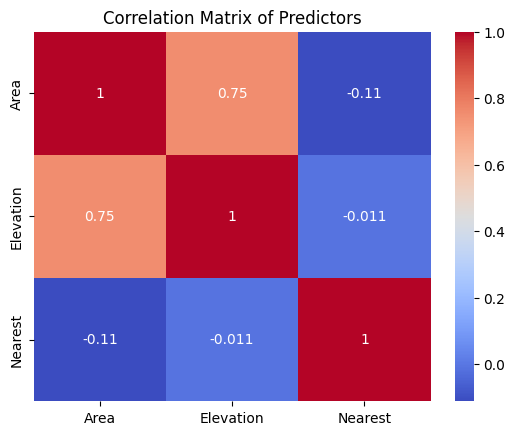

In [5]:
# Calculate the correlation matrix
correlation_matrix = data[['Area', 'Elevation', 'Nearest']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Predictors')
plt.show()

### Interpretation of Multicollinearity Evaluation ###

**Area & Elevation**

- Pearson correlation coefficient: 0.75
- There is a strong positive correlation: as area increases, elevation tends to increase
- These factors are likely multicollinear, which may be inflating the value of the regression coefficients

**Area & Nearest**

- Pearson correlation coefficient: -0.11
- There is a weak, statistically insignificant negative correlation between area and nearest

**Elevation & Nearest**
- Pearson correlation coefficient: -0.01
- There is a very weak, statistically insiginificant negative correlation between elevation and nearest

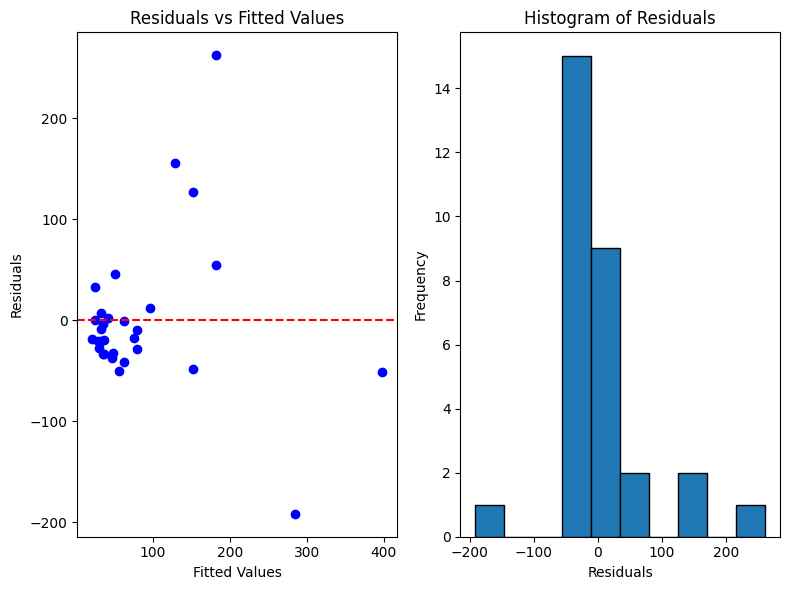

In [7]:
import matplotlib.pyplot as plt


# Get the residuals
residuals = model.resid


# Create a 2x1 grid for the plots
fig, axes = plt.subplots(1, 2, figsize=(8, 6))  # 2 rows, 1 column


# Plot 1: Residuals vs Fitted Values
axes[0].scatter(model.fittedvalues, residuals, color='blue')
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuals vs Fitted Values')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')


# Plot 2: Histogram of Residuals
axes[1].hist(residuals, bins=10, edgecolor='black')
axes[1].set_title('Histogram of Residuals')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()


# Show the plots
plt.show()

### Interpretation of Residuals Visualizations ###

#### Residuals vs. Fitted Values (left) ####

- Residuals are scattered unevenly around the horizontal line at zero with noticeable outliers
- There is a concentration of residuals on the left of the chart; residuals spread out as you move right
- This suggests a violation of the assumption of homoscedasticity and indicates further analysis is required

#### Histogram of Residuals (right) ####

- The histogram is right-skewed with possible outliers on the right and left
- This indicates a violation of the normality of residuals assumption and also points to further analysis

In [8]:
# Define new data for prediction
new_data = pd.DataFrame({'const': [1], 'Area': [10], 'Elevation': [100], 'Nearest': [1.5]})

# Predict the number of species
prediction = model.predict(new_data)
print(f"Predicted number of species: {prediction[0]:.2f}")

Predicted number of species: 33.90


### Final Recommendations ###
While Elevation is significant and useful for predictions, the lack of normality and heteroscedasticity in residuals suggests that improvements can be made to the model.

#### Next Steps ####
- Address heteroscedasticity by transforming predictors or responses (e.g., log transformation).
- Investigate the inclusion of other ecological variables that may better explain species richness.
- Consider robust regression methods if influential outliers persist.